Analytical Solution:
Intercept (b0): 1.24
Slope (b1): 1.17
SSE: 5.62
R^2: 0.95

Full-Batch Gradient Descent:
Intercept (b0): 1.18
Slope (b1): 1.18
SSE: 5.63
R^2: 0.95

Stochastic Gradient Descent:
Intercept (b0): 1.14
Slope (b1): 1.19
SSE: 5.67
R^2: 0.95



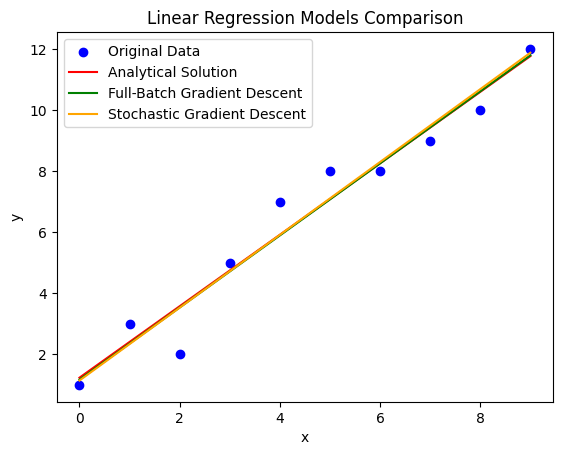

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Data
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

# Analytical Solution
def analytical_solution(x, y):
    n = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x * y)
    sum_x_squared = np.sum(x ** 2)

    # Compute slope (b1) and intercept (b0)
    b1 = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x ** 2)
    b0 = (sum_y - b1 * sum_x) / n

    return b0, b1

# Prediction Function
def predict(x, b0, b1):
    return b0 + b1 * x

# SSE Calculation
def calculate_sse(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2)

# R^2 Calculation
def calculate_r2(y_true, y_pred):
    y_mean = np.mean(y_true)
    ss_total = np.sum((y_true - y_mean) ** 2)
    ss_residual = calculate_sse(y_true, y_pred)
    return 1 - (ss_residual / ss_total)

# Full-Batch Gradient Descent
def full_batch_gradient_descent(x, y, learning_rate=0.01, epochs=1000):
    n = len(x)
    b0, b1 = 0, 0  # Initialize coefficients
    for _ in range(epochs):
        y_pred = b0 + b1 * x
        error = y_pred - y

        # Gradient for b0 and b1
        b0_grad = (1/n) * np.sum(error)
        b1_grad = (1/n) * np.sum(error * x)

        # Update coefficients
        b0 -= learning_rate * b0_grad
        b1 -= learning_rate * b1_grad

    return b0, b1

# Stochastic Gradient Descent
def stochastic_gradient_descent(x, y, learning_rate=0.01, epochs=1000):
    n = len(x)
    b0, b1 = 0, 0  # Initialize coefficients
    for _ in range(epochs):
        for i in range(n):
            y_pred = b0 + b1 * x[i]
            error = y_pred - y[i]

            # Gradient for b0 and b1 for a single point
            b0_grad = error
            b1_grad = error * x[i]

            # Update coefficients
            b0 -= learning_rate * b0_grad
            b1 -= learning_rate * b1_grad

    return b0, b1

# Perform Linear Regression using Analytical Solution
b0_analytical, b1_analytical = analytical_solution(x, y)
y_pred_analytical = predict(x, b0_analytical, b1_analytical)
sse_analytical = calculate_sse(y, y_pred_analytical)
r2_analytical = calculate_r2(y, y_pred_analytical)

print("Analytical Solution:")
print(f"Intercept (b0): {b0_analytical:.2f}")
print(f"Slope (b1): {b1_analytical:.2f}")
print(f"SSE: {sse_analytical:.2f}")
print(f"R^2: {r2_analytical:.2f}\n")

# Perform Full-Batch Gradient Descent
b0_full_batch, b1_full_batch = full_batch_gradient_descent(x, y)
y_pred_full_batch = predict(x, b0_full_batch, b1_full_batch)
sse_full_batch = calculate_sse(y, y_pred_full_batch)
r2_full_batch = calculate_r2(y, y_pred_full_batch)

print("Full-Batch Gradient Descent:")
print(f"Intercept (b0): {b0_full_batch:.2f}")
print(f"Slope (b1): {b1_full_batch:.2f}")
print(f"SSE: {sse_full_batch:.2f}")
print(f"R^2: {r2_full_batch:.2f}\n")

# Perform Stochastic Gradient Descent
b0_sgd, b1_sgd = stochastic_gradient_descent(x, y)
y_pred_sgd = predict(x, b0_sgd, b1_sgd)
sse_sgd = calculate_sse(y, y_pred_sgd)
r2_sgd = calculate_r2(y, y_pred_sgd)

print("Stochastic Gradient Descent:")
print(f"Intercept (b0): {b0_sgd:.2f}")
print(f"Slope (b1): {b1_sgd:.2f}")
print(f"SSE: {sse_sgd:.2f}")
print(f"R^2: {r2_sgd:.2f}\n")

# Plotting the results
plt.scatter(x, y, color='blue', label='Original Data')
plt.plot(x, y_pred_analytical, color='red', label='Analytical Solution')
plt.plot(x, y_pred_full_batch, color='green', label='Full-Batch Gradient Descent')
plt.plot(x, y_pred_sgd, color='orange', label='Stochastic Gradient Descent')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression Models Comparison')
plt.show()
